# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Your code here
data = pd.read_csv('data_all.zip')

In [3]:
data[data.e == 21]

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
408,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
605,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
721,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
871,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115936,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116046,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116160,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116184,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


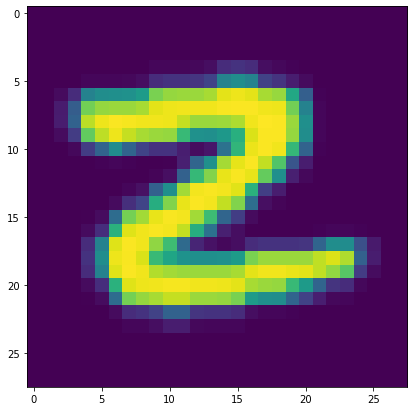

In [4]:
plt.figure(figsize=(7, 7))
plt.imshow(data.values[149, 1:].reshape(28, 28))
plt.show();

In [5]:
def clasificar_data(e_label):
    if (e_label >= 0) and (e_label <= 9):
        return 1
    elif (e_label >= 10) and (e_label <= 35):
        return 2
    elif (e_label >= 36) and (e_label <= 61):
        return 3
        
data['Type'] = data.e.apply(clasificar_data)
data['Capital'] = np.where(data.Type == 2,1,0)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [6]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [7]:
X = np.array(data.drop(['e','Type','Capital'],axis=1))
y = np.array(data.Capital)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
logisticReg_cap = LogisticRegression()
logisticReg_cap.fit(X_train, y_train)
logisticReg_cap_pred = logisticReg_cap.predict(X_test)
print('MODEL SCORE: ',logisticReg_cap.score(X_train, y_train))
print('REGRESSION SCORE: ',r2_score(y_test, logisticReg_cap_pred))

C:\Users\Eleazar Pérez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eleazar Pérez\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MODEL SCORE:  0.753151294367968
REGRESSION SCORE:  -0.27673150296851845


In [9]:
linearSVC_cap = LinearSVC()
linearSVC_cap.fit(X_train, y_train)
linearSVC_cap_pred = linearSVC_cap.predict(X_test)
print('MODEL SCORE: ',linearSVC_cap.score(X_train, y_train))
print('REGRESSION SCORE: ',r2_score(y_test, linearSVC_cap_pred))

MODEL SCORE:  0.41165092362745415
REGRESSION SCORE:  -2.027815667253339


C:\Users\Eleazar Pérez\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
sgdClass_cap = SGDClassifier(max_iter=1000, tol=1e-3)
sgdClass_cap.fit(X_train, y_train)
sgdClass_cap_pred = sgdClass_cap.predict(X_test)
print('MODEL SCORE: ',sgdClass_cap.score(X_train, y_train))
print('REGRESSION SCORE: ',r2_score(y_test, sgdClass_cap_pred))

MODEL SCORE:  0.607713551909045
REGRESSION SCORE:  -1.0276983377897877


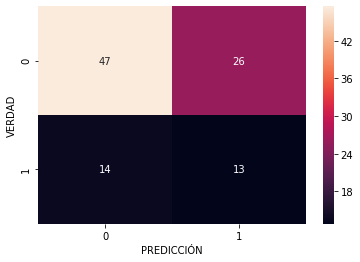

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusionm = confusion_matrix(y_test, sgdClass_cap_pred)
ax=sns.heatmap((confusionm/len(sgdClass_cap_pred)*100), annot=True)
b,t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.xlabel('PREDICCIÓN')
plt.ylabel('VERDAD')
plt.show();

* Try to do the same thing with lowercases.

In [12]:
# Your code here
data['Lower'] = np.where(data.Type == 3,1,0)
X = data.drop(['e','Type','Capital','Lower'],axis=1)
y = data.Lower

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.2)

In [13]:
sgdClass_cap_l = SGDClassifier(max_iter=1000, tol=1e-3)
sgdClass_cap_l.fit(X_train_l, y_train_l)
sgdClass_cap_l_pred = sgdClass_cap_l.predict(X_test_l)

print('MODEL SCORE: ',sgdClass_cap_l.score(X_train_l, y_train_l))
print('REGRESSION SCORE: ',r2_score(y_test_l, sgdClass_cap_l_pred))

MODEL SCORE:  0.7682495674694004
REGRESSION SCORE:  -0.3048166639839842


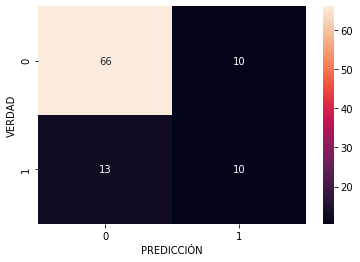

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusionm = confusion_matrix(y_test_l, sgdClass_cap_l_pred)
ax=sns.heatmap((confusionm/len(sgdClass_cap_l_pred)*100), annot=True)
b,t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.xlabel('PREDICCIÓN')
plt.ylabel('VERDAD')
plt.show();

* Try to do the same thing with numbers.

In [16]:
# Your code here
data['Num'] = np.where(data.Type == 1,1,0)
X = data.drop(['e','Type','Capital','Lower','Num'],axis=1)
y = data.Num

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.2)

In [17]:
sgdClass_cap_n = SGDClassifier(max_iter=1000, tol=1e-3)
sgdClass_cap_n.fit(X_train_n, y_train_n)
sgdClass_cap_n_pred = sgdClass_cap_n.predict(X_test_n)

print('MODEL SCORE: ',sgdClass_cap_n.score(X_train_n, y_train_n))
print('REGRESSION SCORE: ',r2_score(y_test_n, sgdClass_cap_n_pred))

MODEL SCORE:  0.6578548631483929
REGRESSION SCORE:  -0.3672048663116836


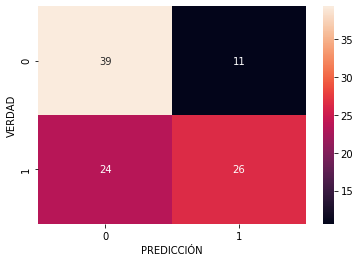

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusionm = confusion_matrix(y_test_n, sgdClass_cap_n_pred)
ax=sns.heatmap((confusionm/len(sgdClass_cap_n_pred)*100), annot=True)
b,t=ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.xlabel('PREDICCIÓN')
plt.ylabel('VERDAD')
plt.show();